# Introduction
In this competition, you’ll build algorithms to rate the complexity of reading passages for grade 3-12 classroom use. 

In any machine learning problem, the data cleaning and preprocessing is as important as building a machine learning model, especially when it comes to unstructured data like texts.

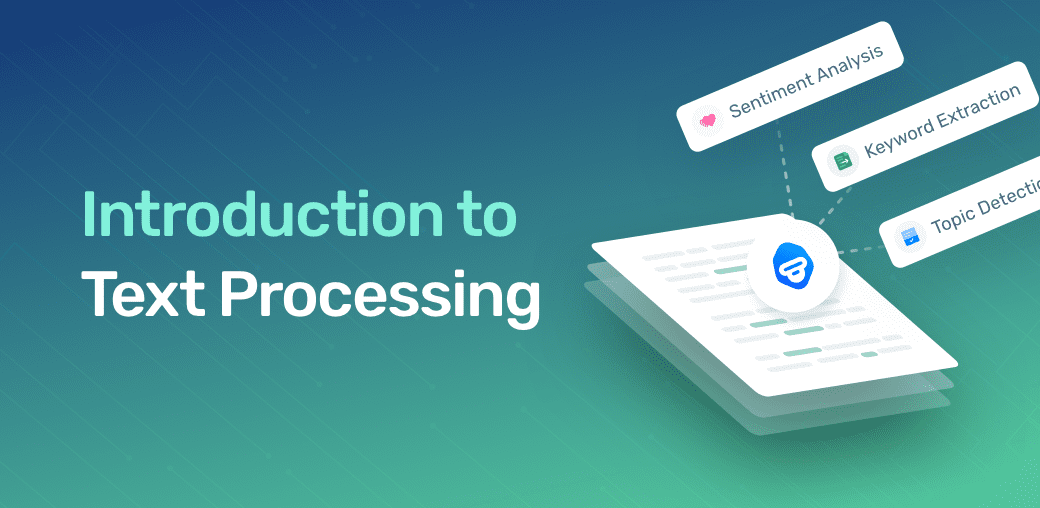

This kernel will take you through some of the well known text pre-processing steps like:

*  Lower casing
*  Removal of HTML tags & noise
*  Removing accented characters
*  Removing special characters, numbers & symbols
*  Handling contractions
*  Stemming
*  Lemmatization
*  Tokenization
*  Stopwords removal

These are some text pre-processing steps but we don't generally do all of these steps all the time. These steps are to be selected depending on the context of the data and what exaclty we want to do.

For example, in sentiment analysis use case, we need not remove the emojis or emoticons as it will convey some important information about the sentiment. Similarly we need to decide based on our use cases.
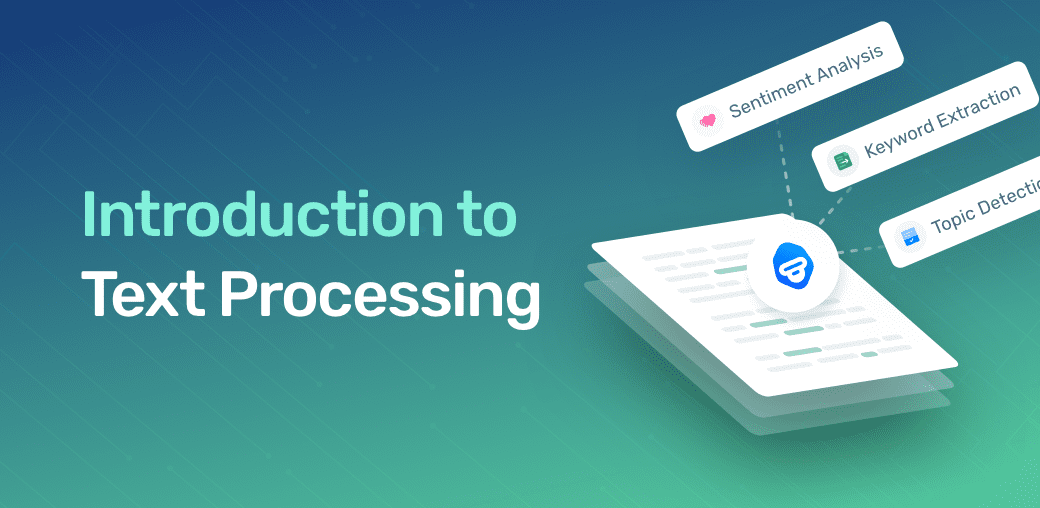

## Importing Libraries
One can import all the libraries at a time in single cell or can import libraries on the go wherever needed.

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy

## Load the dataset

In [ ]:
train_data = pd.read_csv('../input/commonlitreadabilityprize/train.csv')
test_data = pd.read_csv('../input/commonlitreadabilityprize/test.csv')

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
train_data = train_data[['excerpt']]
test_data = test_data[['excerpt']]

### Lower Casing
This is one of the basic pre-processing step. This is an important steps to perform as it helps you to convert all the strings into same casing format so that the texts like Lower, lower, and LOWER are considered same. This helps you to reduce the duplication of same word which might be counted as unique words.

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt'].str.lower()   # First we need to convert the given texts to string and then apply case conversion methods
test_data['excerpt_lower'] = test_data['excerpt'].str.lower()

In [ ]:
train_data.head()

In [ ]:
test_data.head()

### Removal of HTML tags & noise
This processing steps becomes handy when you are dealing with the scraped data from different websites.

In [ ]:
import requests

data = requests.get('http://www.gutenberg.org/cache/epub/8001/pg8001.html')
content = data.text
print(content[2745:3948])

In [ ]:
!pip install bs4

In [ ]:
import re
from bs4 import BeautifulSoup

def strip_html_tags(text):
    """
    This function will remove the HTML tags & noise from the scraped data.
    """
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

clean_content = strip_html_tags(content)
print(clean_content[1163:1957])

You can observe in the texts above that all the tags like **br** or **img** are removed from the texts.

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(strip_html_tags)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(strip_html_tags)

### Removing Accented Characters
Sometimes we may find some accented characters present in the texts we are dealing with. 

Accented characters look like: 'Sómě Áccěntěd těxt'

In [ ]:
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [ ]:
s = 'Sómě Áccěntěd těxt'
s

In [ ]:
remove_accented_chars(s)

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(remove_accented_chars)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(remove_accented_chars)

### Removing Special Characters, Numbers & Symbols
Another common text pre-processing technique is to remove the special characters, numbers and symbols from texts.

*  Special characters: *&^%#@(!
*  Numbers: 0-9
* Symbols: 🙂🙂🙂.

In [ ]:
import re

def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-Z0-9\s]' if not remove_digits else r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', text)
    return text

In [ ]:
s = "Well this was fun! See you at 7:30, What do you think!!? #$@@9318@ 🙂🙂🙂"
s

In [ ]:
remove_special_characters(s, remove_digits=False)

In [ ]:
remove_special_characters(s)

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(remove_special_characters)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(remove_special_characters)

### Expanding Contractions

In [ ]:
!pip install contractions
!pip install textsearch

In [ ]:
s = "Y'all can't expand contractions I'd think! You wouldn't be able to. How'd you do it?"
s

In [ ]:
import contractions

list(contractions.contractions_dict.items())[:10]

In [ ]:
contractions.fix(s)

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(contractions.fix)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(contractions.fix)

### Stemming
Stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form

For example, if there are two words in the corpus walks and walking, then stemming will stem the suffix to make them walk. But say in another example, we have two words console and consoling, the stemmer will remove the suffix and make them consol which is not a proper english word.

There are several type of stemming algorithms available and one of the famous one is porter stemmer which is widely used. We can use nltk package for the same.

In [ ]:
# Porter Stemmer
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped')

In [ ]:
ps.stem('lying')

In [ ]:

ps.stem('strange')

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(ps.stem)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(ps.stem)

### Lemmatization
Lemmatization is similar to stemming in reducing inflected words to their word stem but differs in the way that it makes sure the root word (also called as lemma) belongs to the language.

As a result, this one is generally slower than stemming process. So depending on the speed requirement, we can choose to use either stemming or lemmatization.

Let us use the WordNetLemmatizer in nltk to lemmatize our sentences

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [ ]:
help(wnl.lemmatize)

In [ ]:
# lemmatize nouns
print(wnl.lemmatize('cars', 'n'))
print(wnl.lemmatize('boxes', 'n'))

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(wnl.lemmatize)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(wnl.lemmatize)

### Tokenization
Tokenization is to split the entire paragraph or sentence into single words.

In [ ]:
s = 'The brown foxes are quick and they are jumping over the sleeping lazy dogs!'
tokens = nltk.word_tokenize(s)
print(tokens)

In [ ]:
train_data['excerpt_lower'] = train_data['excerpt_lower'].apply(nltk.word_tokenize)
test_data['excerpt_lower'] = test_data['excerpt_lower'].apply(nltk.word_tokenize)

### Stopword Removal


In [ ]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train_data["excerpt_lower"] = train_data["excerpt_lower"].apply(lambda text: remove_stopwords(text))
test_data["excerpt_lower"] = test_data["excerpt_lower"].apply(lambda text: remove_stopwords(text))

# Credits
*  https://www.kaggle.com/sudalairajkumar/getting-started-with-text-preprocessing
*  https://github.com/dphi-official/nlp_essentials/blob/master/notebooks/01_Text_Wrangling_Examples.ipynb